# Automated CCR task generation

Code by Jacqueline Maasch | November 2024

## Preamble

In [1]:
# General importations.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import platform
import time
import warnings
import math
import string
from random import shuffle, seed
from faker.providers.person.en import Provider
import networkx as nx
import itertools

from task_generation import TaskGenerator

# View versioning.
print("python version     :", platform.python_version())
print("numpy version      :", np.__version__)
print("pandas version     :", pd.__version__)
print("matplotlib version :", matplotlib.__version__)
print("seaborn version    :", sns.__version__)
print("networkx version    :", nx.__version__)

python version     : 3.10.13
numpy version      : 1.26.3
pandas version     : 2.1.4
matplotlib version : 3.8.0
seaborn version    : 0.12.2
networkx version    : 3.4.2


## Automated design

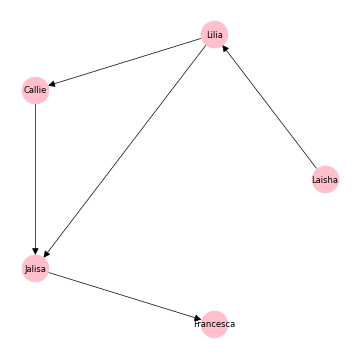

A group of friends is going to a party where candies will be randomly distributed. Laisha will be happy if she gets at least 5 candies. Lilia will be happy if she gets at least 5 candies or if Laisha is happy. Callie will be happy if she gets at least 5 candies or if Lilia is happy. Jalisa will be happy if she gets at least 5 candies or if Lilia is happy or if Callie is happy. Francesca will be happy if she gets at least 5 candies or if Jalisa is happy.  After distributing the candies, Laisha gets 5 candies, Lilia gets 3 candies, Callie gets 6 candies, Jalisa gets 6 candies, and Francesca gets 3 candies.
Is Francesca happy? Be as concise as possible.
Now, suppose that Laisha is happy, regardless of her other circumstances. With this assumption, is Francesca happy? Be as concise as possible.
Now, suppose that Laisha is not happy, regardless of her other circumstances. With this assumption, is Francesca happy? Be as concise as possible.
('Laisha', 'Francesca')
[('Laisha', 'Lilia'), ('Lai

,Laisha,Lilia,Callie,Jalisa,Francesca
0,1,1,1,1,1
1,1,1,1,1,1
2,0,0,1,1,1
3,0,0,0,1,1
4,0,1,1,1,1
...,...,...,...,...,...
995,1,1,1,1,1
996,1,1,1,1,1
997,0,0,0,1,1
998,1,1,1,1,1


Laisha
1    505
0    495
Name: count, dtype: int64
Lilia
1    750
0    250
Name: count, dtype: int64
Callie
1    875
0    125
Name: count, dtype: int64
Jalisa
1    940
0     60
Name: count, dtype: int64
Francesca
1    969
0     31
Name: count, dtype: int64



In [2]:
# Instantiate task.
tg = TaskGenerator(n_per_bcc = [2,3,2], 
                   bcc_types = ["cycle", "cycle", "cycle"], 
                   label_as = "names")

print(tg.generate_context_prompt(theme = "candy", 
                                 conjunction = "or"))
print(tg.generate_factual_prompt(theme = "candy",
                                 effect_node = tg.nodes[-1]))
print(tg.generate_counterfactual_prompt(theme = "candy",
                                        effect_node = tg.nodes[-1],
                                        intervene_node = tg.nodes[0],
                                        intervene_value = 1))
print(tg.generate_counterfactual_prompt(theme = "candy",
                                        effect_node = tg.nodes[-1],
                                        intervene_node = tg.nodes[0],
                                        intervene_value = 0))
print(tg.get_global())
print(tg.get_local())
print(tg.get_compositions())
print("Truth:", tg.get_ground_truth())
print()
df = tg.sample_scm(tg.dag)
print(df.info())
display(df)
for col in df:
    print(df[col].value_counts())
print()

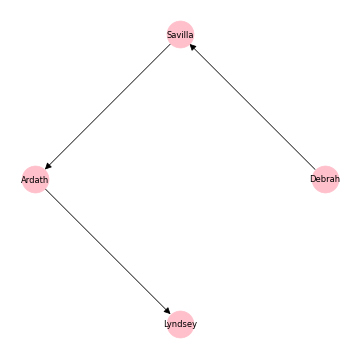

A group of friends is planting a bed of flowers from seed, but the seed packets are not labeled. Debrah will be happy if the flowers she planted are red. Savilla will be happy if the flowers she planted are purple or if Debrah is happy. Ardath will be happy if the flowers she planted are purple or if Savilla is happy. Lyndsey will be happy if the flowers she planted are red or if Ardath is happy.  Once the flowers bloom, Debrah's flowers are mustard yellow, Savilla's flowers are baby pink, Ardath's flowers are bubblegum pink, and Lyndsey's flowers are bubblegum pink.
A group of friends is planting a bed of flowers from seed, but the seed packets are not labeled. Debrah will be happy if the flowers she planted are red. Savilla will be happy if the flowers she planted are purple or if Debrah is happy. Ardath will be happy if the flowers she planted are purple or if Savilla is happy. Lyndsey will be happy if the flowers she planted are red or if Ardath is happy.  Once the flowers bloom, D

,Debrah,Savilla,Ardath,Lyndsey
0,0,0,0,0
1,0,0,0,0
2,0,0,1,1
3,0,0,0,0
4,0,1,1,1
...,...,...,...,...
995,1,1,1,1
996,0,0,0,0
997,0,0,0,1
998,0,0,1,1


Debrah
0    753
1    247
Name: count, dtype: int64
Savilla
0    569
1    431
Name: count, dtype: int64
Ardath
1    569
0    431
Name: count, dtype: int64
Lyndsey
1    678
0    322
Name: count, dtype: int64



In [3]:
# Instantiate task.
tg = TaskGenerator(n_per_bcc = [2,2,2], 
                   bcc_types = ["cycle", "cycle", "cycle"], 
                   label_as = "names")

print(tg.generate_context_prompt(theme = "flowers", 
                                 conjunction = "or"))
print(tg.generate_context_prompt(theme = "flowers", 
                                 conjunction = "or",
                                 set_received = True))
print(tg.get_global())
print(tg.get_local())
print(tg.get_compositions())
print("Truth:", tg.get_ground_truth(qualitative = True))
print()
df = tg.sample_scm(tg.dag, qualitative = True)
print(df.info())
display(df)
for col in df:
    print(df[col].value_counts())
print()

In [4]:
type(tg.colors_received)

list

In [5]:
print(tg.generate_context_prompt(theme = "vaccine", 
                                 conjunction = "and",
                                 set_received = True))
print(tg.generate_factual_prompt(theme = "vaccine",
                                 effect_node = tg.nodes[-1]))
print(tg.generate_counterfactual_prompt(theme = "vaccine",
                                        effect_node = tg.nodes[-1],
                                        intervene_node = tg.nodes[0],
                                        intervene_value = 1))
print(tg.generate_counterfactual_prompt(theme = "vaccine",
                                        effect_node = tg.nodes[-1],
                                        intervene_node = tg.nodes[0],
                                        intervene_value = 0))

print()
df = tg.sample_scm(tg.dag)
print(df.info())
display(df)
for col in df:
    print(df[col].value_counts())

A group of friends is considering whether or not to get vaccinated against the flu this year. Debrah will get vaccinated if she was sick for at least 5 days in the previous flu season. Savilla will get vaccinated if she was sick for at least 5 days in the previous flu season and her friend Debrah gets vaccinated. Ardath will get vaccinated if she was sick for at least 5 days in the previous flu season and her friend Savilla gets vaccinated. Lyndsey will get vaccinated if she was sick for at least 5 days in the previous flu season and her friend Ardath gets vaccinated.  During the previous flu season, Debrah was sick for 6 days, Savilla was sick for 8 days, Ardath was sick for 8 days, and Lyndsey was sick for 3 days.
Did Lyndsey get vaccinated? Be as concise as possible.
Now, suppose that Debrah got vaccinated, regardless of her other circumstances. With this assumption, did Lyndsey get vaccinated? Be as concise as possible.
Now, suppose that Debrah did not get vaccinated, regardless of

,Debrah,Savilla,Ardath,Lyndsey
0,1,0,0,0
1,1,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
995,1,1,0,0
996,1,0,0,0
997,0,0,0,0
998,1,1,1,1


Debrah
1    505
0    495
Name: count, dtype: int64
Savilla
0    744
1    256
Name: count, dtype: int64
Ardath
0    862
1    138
Name: count, dtype: int64
Lyndsey
0    939
1     61
Name: count, dtype: int64


In [6]:
print(tg.generate_context_prompt(theme = "football", 
                                 conjunction = "and",
                                 set_received = True))
print(tg.generate_factual_prompt(theme = "football",
                                 effect_node = tg.nodes[-1]))
print(tg.generate_counterfactual_prompt(theme = "football",
                                        effect_node = tg.nodes[-1],
                                        intervene_node = tg.nodes[0],
                                        intervene_value = 1))
print(tg.generate_counterfactual_prompt(theme = "football",
                                        effect_node = tg.nodes[-1],
                                        intervene_node = tg.nodes[0],
                                        intervene_value = 0))
print()
df = tg.sample_scm(tg.dag)
print(df.info())
display(df)
for col in df:
    print(df[col].value_counts())

A group of friends is considering whether or not to attend an upcoming football game. Debrah will go to the football game if she has been fewer than 5 times this season. Savilla will go to the football game if she has been fewer than 5 times this season and her friend Debrah goes to the game. Ardath will go to the football game if she has been fewer than 5 times this season and her friend Savilla goes to the game. Lyndsey will go to the football game if she has been fewer than 5 times this season and her friend Ardath goes to the game.  So far this season, Debrah has been to 6 games, Savilla has been to 8 games, Ardath has been to 8 games, and Lyndsey has been to 3 games.
Did Lyndsey go to the football game? Be as concise as possible.
Now, suppose that Debrah went to the football game, regardless of her other circumstances. With this assumption, did Lyndsey go to the game? Be as concise as possible.
Now, suppose that Debrah did not go to the football game, regardless of her other circu

,Debrah,Savilla,Ardath,Lyndsey
0,1,0,0,0
1,1,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
995,1,1,0,0
996,1,0,0,0
997,0,0,0,0
998,1,1,1,1


Debrah
1    505
0    495
Name: count, dtype: int64
Savilla
0    744
1    256
Name: count, dtype: int64
Ardath
0    862
1    138
Name: count, dtype: int64
Lyndsey
0    939
1     61
Name: count, dtype: int64


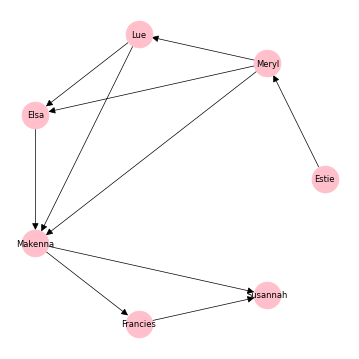

TypeError: TaskGenerator.generate_context_prompt() got multiple values for argument 'theme'

In [7]:
# Instantiate task.
tg = TaskGenerator(n_per_bcc = [2,4,3], 
                   bcc_types = ["cycle", "wheel", "cycle"], 
                   label_as = "names",
                   bern = "random")

print(tg.generate_context_prompt(tg.dag, theme = "candy"))
print()
print(tg.generate_context_prompt(tg.dag, theme = "vaccine", set_received = True))
print()
print(tg.generate_context_prompt(tg.dag, theme = "football", set_received = True))
print()
df = tg.sample_scm(tg.dag)
print(df.info())
display(df)
for col in df:
    print(df[col].value_counts())

In [ ]:
sizes_list = [[2,2,2],[3,3,3],[4,4,4,4],[5,5,5,5,5]]
for sizes in sizes_list:
    tg = TaskGenerator(n_per_bcc = sizes,
                       bcc_types = ["wheel"]*len(sizes), 
                       label_as = "names",
                       bern = "random")
    print(tg.generate_context_prompt(tg.dag, theme = "candy"))
    print()
    print(tg.generate_context_prompt(tg.dag, theme = "vaccine"))
    print()
    print(tg.generate_context_prompt(tg.dag, theme = "football"))
    print()
    df = tg.sample_scm(tg.dag)
    print(df.info())
    display(df)
    for col in df:
        print(df[col].value_counts())

## Manual design

https://stackoverflow.com/questions/49427320/joining-two-networkx-graphs-on-a-single-edge

In [ ]:
g = nx.wheel_graph(n = 3)
adj = nx.to_numpy_array(g)
adj = np.triu(adj)
tg.plot_nx(adj, labels = list(range(adj.shape[0])), figsize = (7,7), dpi = 50)

In [ ]:
g = nx.wheel_graph(n = 5)
adj = nx.to_numpy_array(g)
adj = np.triu(adj)
tg.plot_nx(adj, labels = list(range(adj.shape[0])), figsize = (7,7), dpi = 50)

In [ ]:
g = nx.cycle_graph(n = 5)
adj = nx.to_numpy_array(g)
adj = np.triu(adj)
tg.plot_nx(adj, labels = list(range(adj.shape[0])), figsize = (7,7), dpi = 50)

In [ ]:
g = nx.hypercube_graph(n = 2)
adj = nx.to_numpy_array(g)
adj = np.triu(adj)
tg.plot_nx(adj, labels = list(range(adj.shape[0])), figsize = (7,7), dpi = 50)

In [ ]:
# https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.barbell_graph.html
barbell = nx.barbell_graph(5, 4)
adj = nx.to_numpy_array(barbell)
adj = np.triu(adj)
tg.plot_nx(adj, labels = list(range(adj.shape[0])), figsize = (7,7), dpi = 50)

In [ ]:
# https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.tadpole_graph.html
tadpole = nx.tadpole_graph(m = 4, n = 3)
adj = nx.to_numpy_array(tadpole)
adj = np.triu(adj)
tg.plot_nx(adj, labels = list(range(adj.shape[0])), figsize = (7,7), dpi = 50)

In [ ]:
# https://networkx.org/documentation/stable/reference/generated/networkx.generators.expanders.chordal_cycle_graph.html
wheel = nx.wheel_graph(n = 5)
adj = nx.to_numpy_array(wheel)
adj = np.triu(adj)
tg.plot_nx(adj, labels = list(range(adj.shape[0])), figsize = (7,7), dpi = 50)
row_sums = adj.sum(axis = 1)
leaf_idx = np.where(row_sums == 0)[0]

## End of document